In [159]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
pd.set_option("display.max_rows", 100)

In [160]:
# read csv files orders and positions
position = pd.read_csv("positions.csv")
order = pd.read_csv("orders.csv")

position["time"] = pd.to_datetime(position["time"])
order["time"] = pd.to_datetime(order["time"])

position["date"] = pd.to_datetime(position["time"].dt.date)
order["date"] = pd.to_datetime(order["time"].dt.date)
dates = pd.Index(pd.to_datetime(get_trading_dates("20230103", "20230428", market='cn')),name="date")

In [161]:
order = order[order["filled"]!=0]

In [162]:
temp = pd.DataFrame(order[["security","security_name","date","amount","action","filled","price"]])
temp["direction"] = temp["action"].map(lambda x: 1 if x == "open" else -1)
temp["direction"] = temp["direction"] * temp["filled"]

In [163]:
order["direction"] = order['action'].apply(lambda x: 1 if x == 'open' else -1)

In [164]:
order["direction"] = order["direction"]*order["filled"]

In [165]:
order["result"] = order["direction"]*order["price"]

In [166]:
final = order.groupby("date")["result"].sum().to_frame("result")

In [167]:
final = final.cumsum()

In [ ]:
final_mean = final.resample('5D').mean()

Text(0.5, 1.0, '资金的累计流入流出时序变化圖')

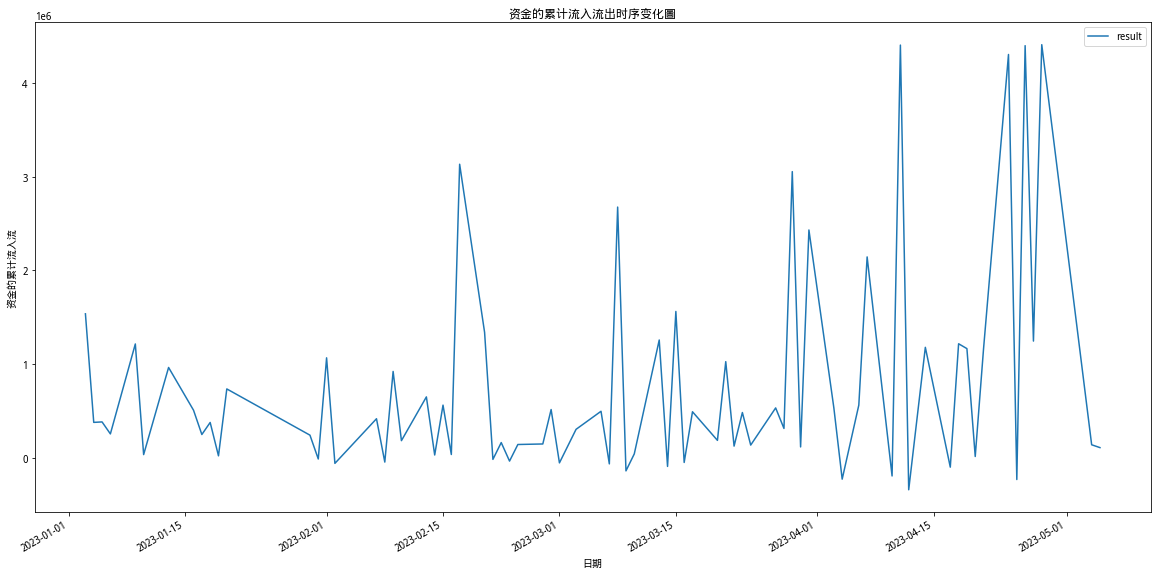

In [169]:
final.plot(figsize = (20,10))
plt.xlabel("日期")
plt.ylabel("资金的累计流入流")
plt.title("资金的累计流入流出时序变化圖")